# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Spotify API Configuration with Spotipy

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import cred

In [3]:
scope = "user-read-recently-played"
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=cred.client_ID, client_secret=cred.client_SECRET, redirect_uri=cred.redirect_url, scope=scope))

# results = sp.current_user_recently_played()
# for idx, item in enumerate(results['items']):
#     track = item['track']
#     print(idx, track['artists'][0]['name'], " – ", track['name'])

In [4]:
def analyze_playlist(creator, playlist_id):
    
    # Create empty dataframe
    playlist_features_list = ["artist","album","track_name",  "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
        
    return playlist_df

### First-time Run

### Existing CSV Run

In [5]:
vibes_to_reset = pd.read_csv('vibes_to_reset.csv')
vibes_to_reset.head()

artist                  album                track_name  \
0       Mac Ayres             Drive Slow                      Easy   
1   Daniel Caesar               Freudian  Best Part (feat. H.E.R.)   
2     Bruno Major  A Song For Every Moon                    Easily   
3           keshi              skeletons                 skeletons   
4  Kendrick Lamar                  DAMN.       LOVE. FEAT. ZACARI.   

                 track_id  danceability  energy  key  loudness  mode  \
0  58dSdjfEYNSxte1aNVxuNf         0.722   0.282    5    -7.484     1   
1  1RMJOxR6GRPsBHL8qeC2ux         0.524   0.364    7   -10.209     1   
2  2k9N4caeCIJLOWwWwssrEM         0.772   0.256    7    -8.545     0   
3  2BuJrxYKhYky20dQqTlobO         0.719   0.265    2   -12.782     1   
4  6PGoSes0D9eUDeeAafB2As         0.800   0.585   10    -7.343     1   

   speechiness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       0.1060           0.00557     0.147    0.217   91.367       314358   
1       0.0367           0.00000     0.100    0.436   75.240       209831   
2       0.0481           0.00612     0.144    0.357  118.902       210240   
3       0.0754           0.08650     0.108    0.273   80.021       152480   
4       0.0924           0.00000     0.153    0.779  126.058       213400   

   time_signature  
0               4  
1               4  
2               3  
3               4  
4               4

## Playlists Classified as 'Happy'

### First-time Run

### Existing CSV Run

In [6]:
mood_booster = pd.read_csv('mood_booster.csv')
great_day = pd.read_csv('great_day.csv')
good_vibes = pd.read_csv('good_vibes.csv')

In [7]:
happy = pd.concat([mood_booster,great_day,good_vibes],ignore_index=True)
happy.head()

artist                                       album  \
0        Post Malone                      Twelve Carat Toothache   
1             NEIKED  Better Days (NEIKED x Mae Muller x Polo G)   
2  Sabrina Carpenter                         emails i can't send   
3             Khalid                                     Skyline   
4       Taylor Swift                                   Midnights   

                                    track_name                track_id  \
0  I Like You (A Happier Song) (with Doja Cat)  0O6u0VJ46W86TxN9wgyqDj   
1   Better Days (NEIKED x Mae Muller x Polo G)  6f5ExP43esnvdKPddwKXJH   
2                                     Nonsense  6dgUya35uo964z7GZXM07g   
3                                      Skyline  1QxIFMs4M8qd5cbJJu80v4   
4                                Lavender Haze  5jQI2r1RdgtuT8S3iG8zFC   

   danceability  energy  key  loudness  mode  speechiness  instrumentalness  \
0         0.733   0.670    5    -6.009     1       0.0751          0.000000   
1         0.717   0.671    0    -5.077     0       0.0337          0.000003   
2         0.740   0.697    8    -4.912     1       0.0340          0.000000   
3         0.733   0.653   11    -6.094     1       0.0391          0.021800   
4         0.733   0.436   10   -10.489     1       0.0800          0.000573   

   liveness  valence    tempo  duration_ms  time_signature  
0    0.1210   0.4720  100.964       192841               4  
1    0.0921   0.6990  110.054       160657               4  
2    0.2240   0.7320  138.992       163648               4  
3    0.1840   0.7520  119.996       182895               5  
4    0.1570   0.0976   96.985       202396               4

In [8]:
happy.duplicated().value_counts()

False    211
True      15
dtype: int64

In [9]:
happy.drop_duplicates(inplace=True)
happy.duplicated().value_counts()

False    211
dtype: int64

In [10]:
happy['mood'] = 1

In [11]:
happy.head()

artist                                       album  \
0        Post Malone                      Twelve Carat Toothache   
1             NEIKED  Better Days (NEIKED x Mae Muller x Polo G)   
2  Sabrina Carpenter                         emails i can't send   
3             Khalid                                     Skyline   
4       Taylor Swift                                   Midnights   

                                    track_name                track_id  \
0  I Like You (A Happier Song) (with Doja Cat)  0O6u0VJ46W86TxN9wgyqDj   
1   Better Days (NEIKED x Mae Muller x Polo G)  6f5ExP43esnvdKPddwKXJH   
2                                     Nonsense  6dgUya35uo964z7GZXM07g   
3                                      Skyline  1QxIFMs4M8qd5cbJJu80v4   
4                                Lavender Haze  5jQI2r1RdgtuT8S3iG8zFC   

   danceability  energy  key  loudness  mode  speechiness  instrumentalness  \
0         0.733   0.670    5    -6.009     1       0.0751          0.000000   
1         0.717   0.671    0    -5.077     0       0.0337          0.000003   
2         0.740   0.697    8    -4.912     1       0.0340          0.000000   
3         0.733   0.653   11    -6.094     1       0.0391          0.021800   
4         0.733   0.436   10   -10.489     1       0.0800          0.000573   

   liveness  valence    tempo  duration_ms  time_signature  mood  
0    0.1210   0.4720  100.964       192841               4     1  
1    0.0921   0.6990  110.054       160657               4     1  
2    0.2240   0.7320  138.992       163648               4     1  
3    0.1840   0.7520  119.996       182895               5     1  
4    0.1570   0.0976   96.985       202396               4     1

## Playlists Classified as 'Sad'

### First-time Run

### Existing CSV Run

In [12]:
sad_songs = pd.read_csv('sad_songs.csv')
life_sucks = pd.read_csv('life_sucks.csv')
idk = pd.read_csv('idk.csv')

In [13]:
sad = pd.concat([sad_songs,life_sucks,idk],ignore_index=True)
sad.head()

artist                 album            track_name  \
0    Dean Lewis  How Do I Say Goodbye  How Do I Say Goodbye   
1     Cat Burns                    go                    go   
2  James Arthur                   YOU         Car's Outside   
3    Becky Hill   Remember (Acoustic)   Remember - Acoustic   
4  Benson Boone          In The Stars          In The Stars   

                 track_id  danceability  energy  key  loudness  mode  \
0  5hnGrTBaEsdukpDF6aZg8a         0.400   0.641    8    -6.303     1   
1  4VtRHZ4tBDHaWltVAytlLY         0.663   0.251    6    -9.870     0   
2  0otRX6Z89qKkHkQ9OqJpKt         0.338   0.562    9    -7.181     1   
3  5aXfGM7WVcqyAvqnL7k0y3         0.620   0.379    3    -8.675     1   
4  1ei3hzQmrgealgRKFxIcWn         0.362   0.540   10    -6.031     1   

   speechiness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       0.0674               0.0    0.0656    0.393   81.552       163603   
1       0.0435               0.0    0.0932    0.528   90.272       215000   
2       0.0290               0.0    0.1070    0.259  149.907       248373   
3       0.0412               0.0    0.1950    0.509  118.899       178627   
4       0.0528               0.0    0.1390    0.300   78.007       216410   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               3

In [14]:
sad.duplicated().value_counts()

False    270
True      10
dtype: int64

In [15]:
sad.drop_duplicates(inplace=True)
sad.duplicated().value_counts()

False    270
dtype: int64

In [16]:
sad['mood'] = 2

In [17]:
sad.head()

artist                 album            track_name  \
0    Dean Lewis  How Do I Say Goodbye  How Do I Say Goodbye   
1     Cat Burns                    go                    go   
2  James Arthur                   YOU         Car's Outside   
3    Becky Hill   Remember (Acoustic)   Remember - Acoustic   
4  Benson Boone          In The Stars          In The Stars   

                 track_id  danceability  energy  key  loudness  mode  \
0  5hnGrTBaEsdukpDF6aZg8a         0.400   0.641    8    -6.303     1   
1  4VtRHZ4tBDHaWltVAytlLY         0.663   0.251    6    -9.870     0   
2  0otRX6Z89qKkHkQ9OqJpKt         0.338   0.562    9    -7.181     1   
3  5aXfGM7WVcqyAvqnL7k0y3         0.620   0.379    3    -8.675     1   
4  1ei3hzQmrgealgRKFxIcWn         0.362   0.540   10    -6.031     1   

   speechiness  instrumentalness  liveness  valence    tempo  duration_ms  \
0       0.0674               0.0    0.0656    0.393   81.552       163603   
1       0.0435               0.0    0.0932    0.528   90.272       215000   
2       0.0290               0.0    0.1070    0.259  149.907       248373   
3       0.0412               0.0    0.1950    0.509  118.899       178627   
4       0.0528               0.0    0.1390    0.300   78.007       216410   

   time_signature  mood  
0               4     2  
1               4     2  
2               4     2  
3               4     2  
4               3     2

## Combining the DataFrame

In [18]:
df = pd.concat([happy,sad],ignore_index=True)
df.head()

artist                                       album  \
0        Post Malone                      Twelve Carat Toothache   
1             NEIKED  Better Days (NEIKED x Mae Muller x Polo G)   
2  Sabrina Carpenter                         emails i can't send   
3             Khalid                                     Skyline   
4       Taylor Swift                                   Midnights   

                                    track_name                track_id  \
0  I Like You (A Happier Song) (with Doja Cat)  0O6u0VJ46W86TxN9wgyqDj   
1   Better Days (NEIKED x Mae Muller x Polo G)  6f5ExP43esnvdKPddwKXJH   
2                                     Nonsense  6dgUya35uo964z7GZXM07g   
3                                      Skyline  1QxIFMs4M8qd5cbJJu80v4   
4                                Lavender Haze  5jQI2r1RdgtuT8S3iG8zFC   

   danceability  energy  key  loudness  mode  speechiness  instrumentalness  \
0         0.733   0.670    5    -6.009     1       0.0751          0.000000   
1         0.717   0.671    0    -5.077     0       0.0337          0.000003   
2         0.740   0.697    8    -4.912     1       0.0340          0.000000   
3         0.733   0.653   11    -6.094     1       0.0391          0.021800   
4         0.733   0.436   10   -10.489     1       0.0800          0.000573   

   liveness  valence    tempo  duration_ms  time_signature  mood  
0    0.1210   0.4720  100.964       192841               4     1  
1    0.0921   0.6990  110.054       160657               4     1  
2    0.2240   0.7320  138.992       163648               4     1  
3    0.1840   0.7520  119.996       182895               5     1  
4    0.1570   0.0976   96.985       202396               4     1

# EDA

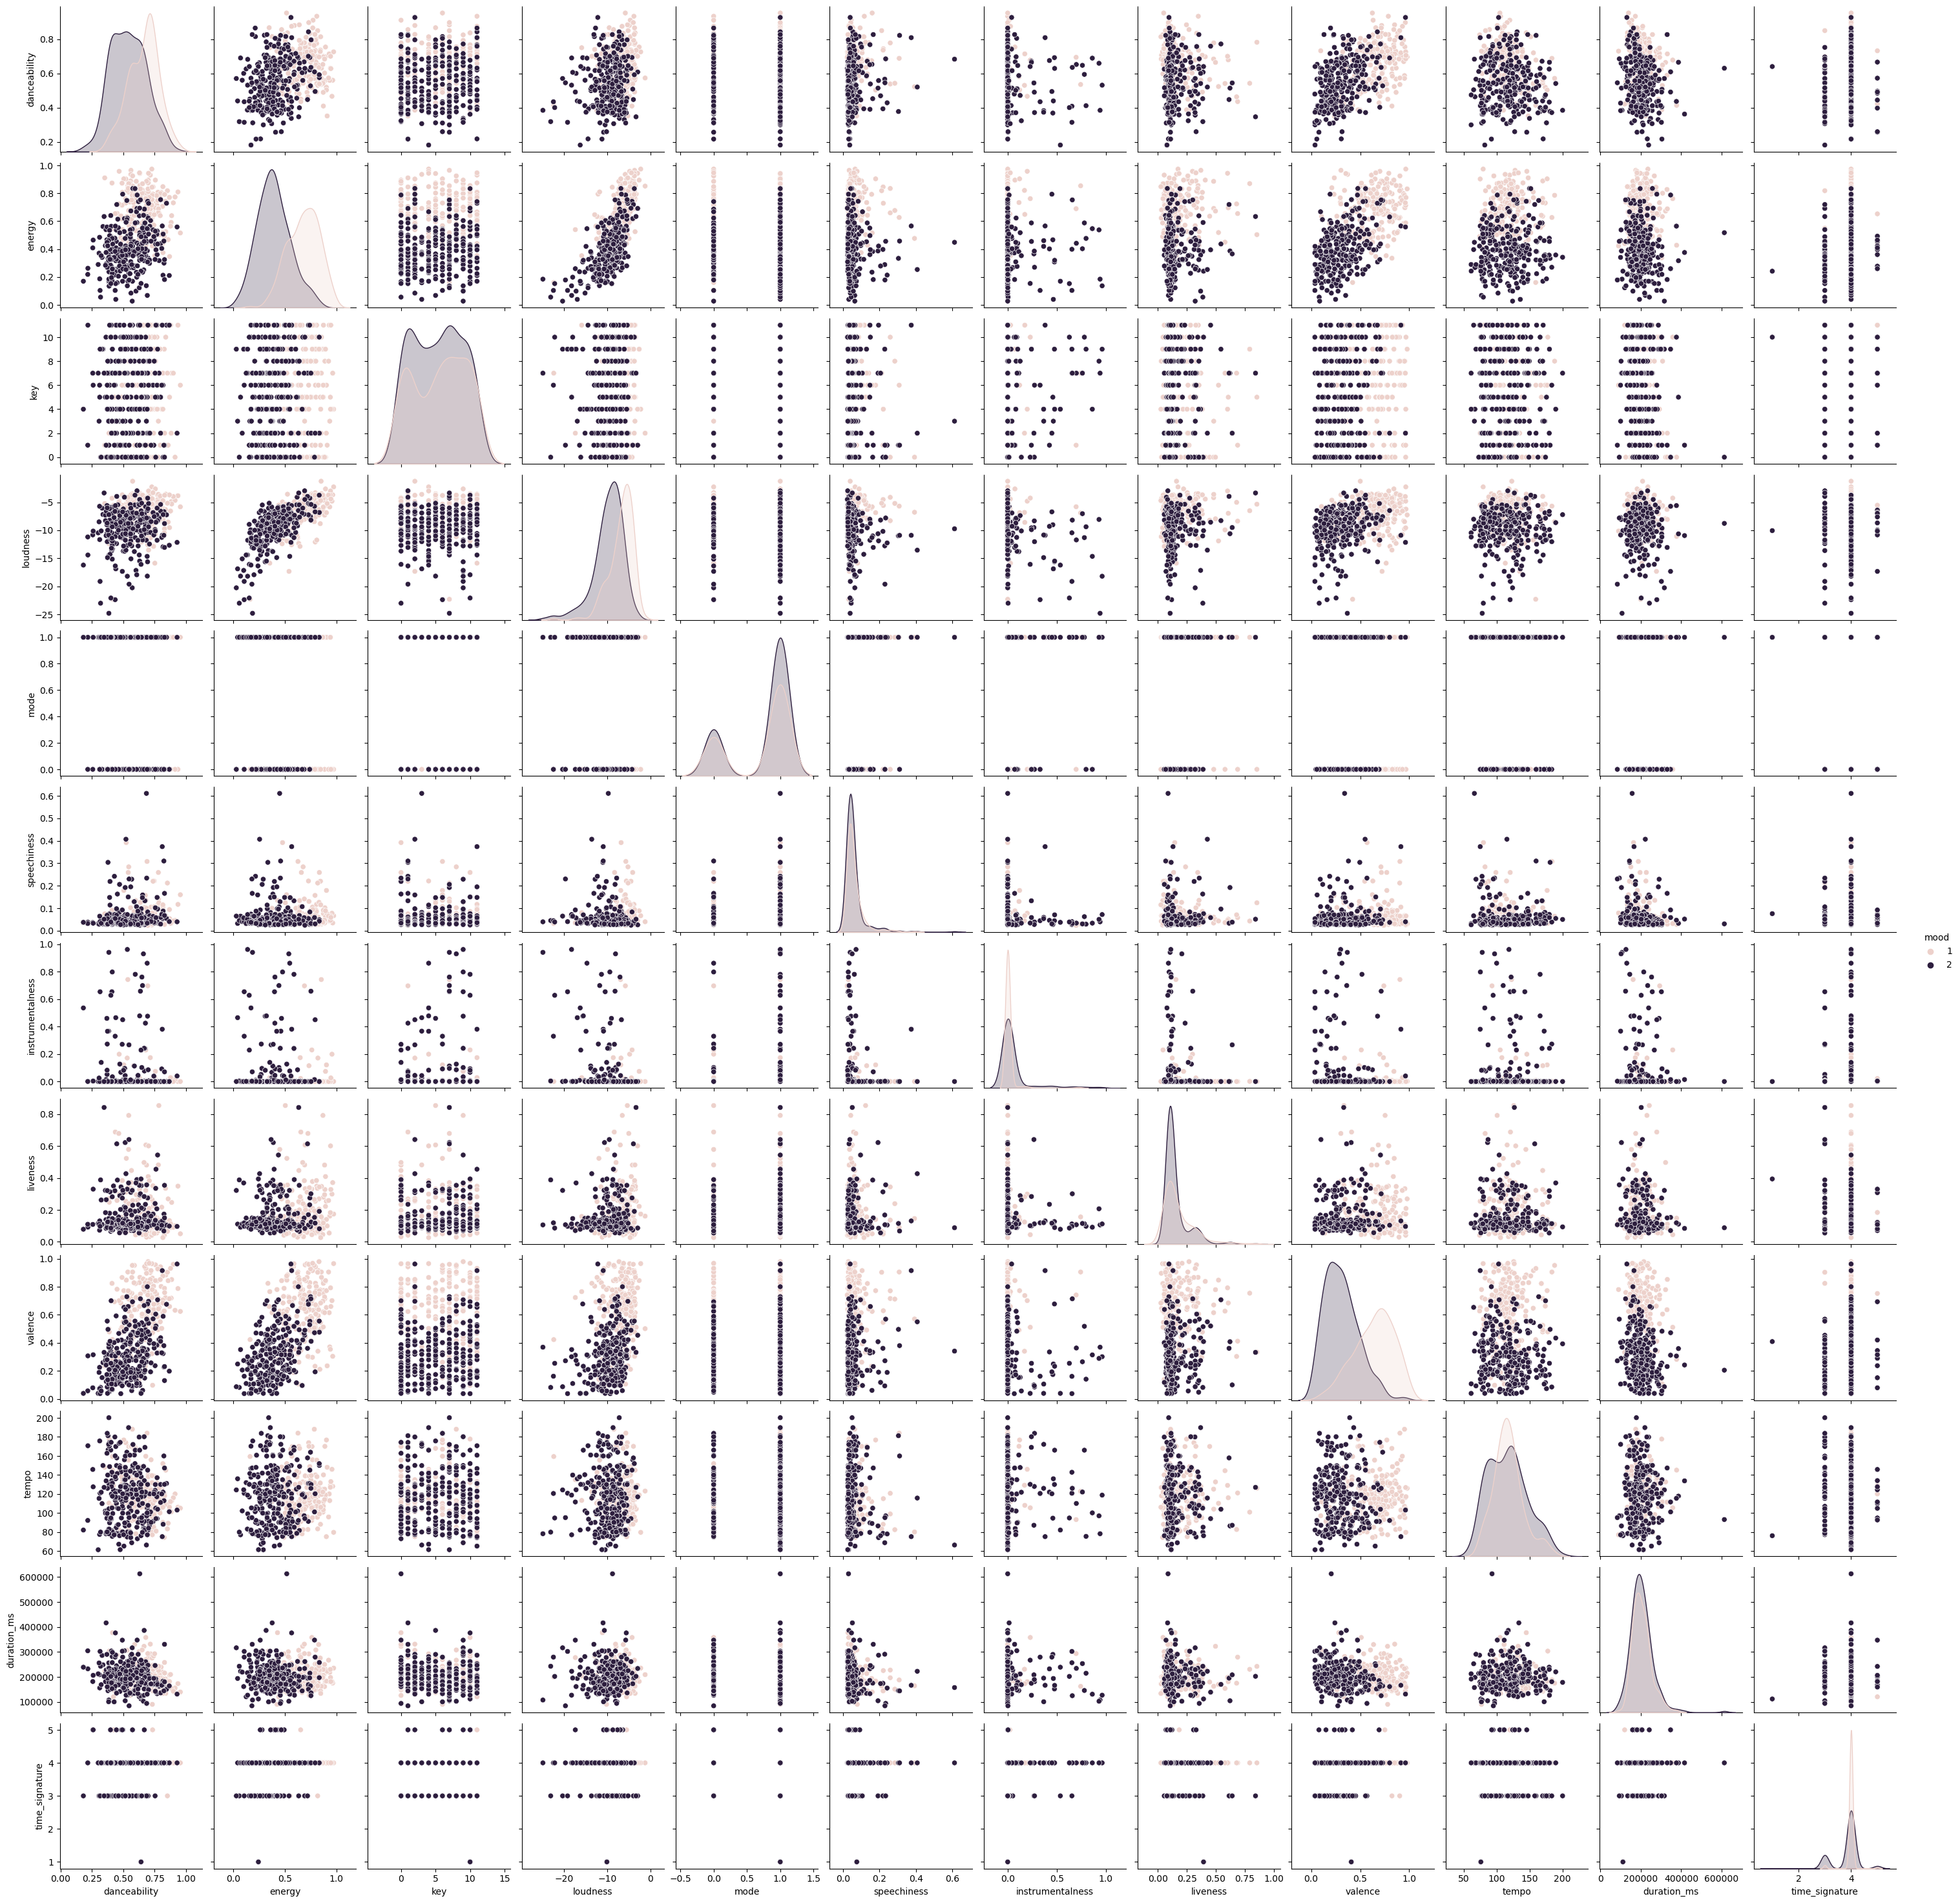

In [19]:
sns.pairplot(df,hue='mood')

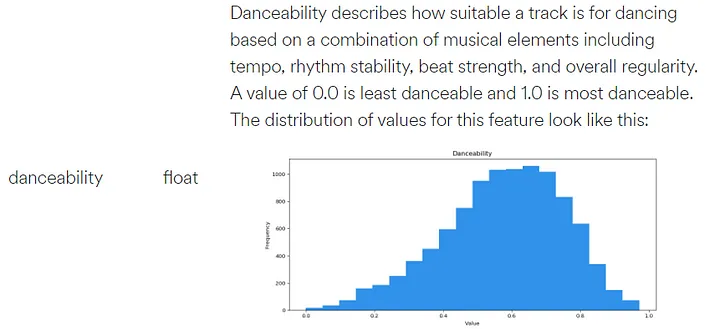

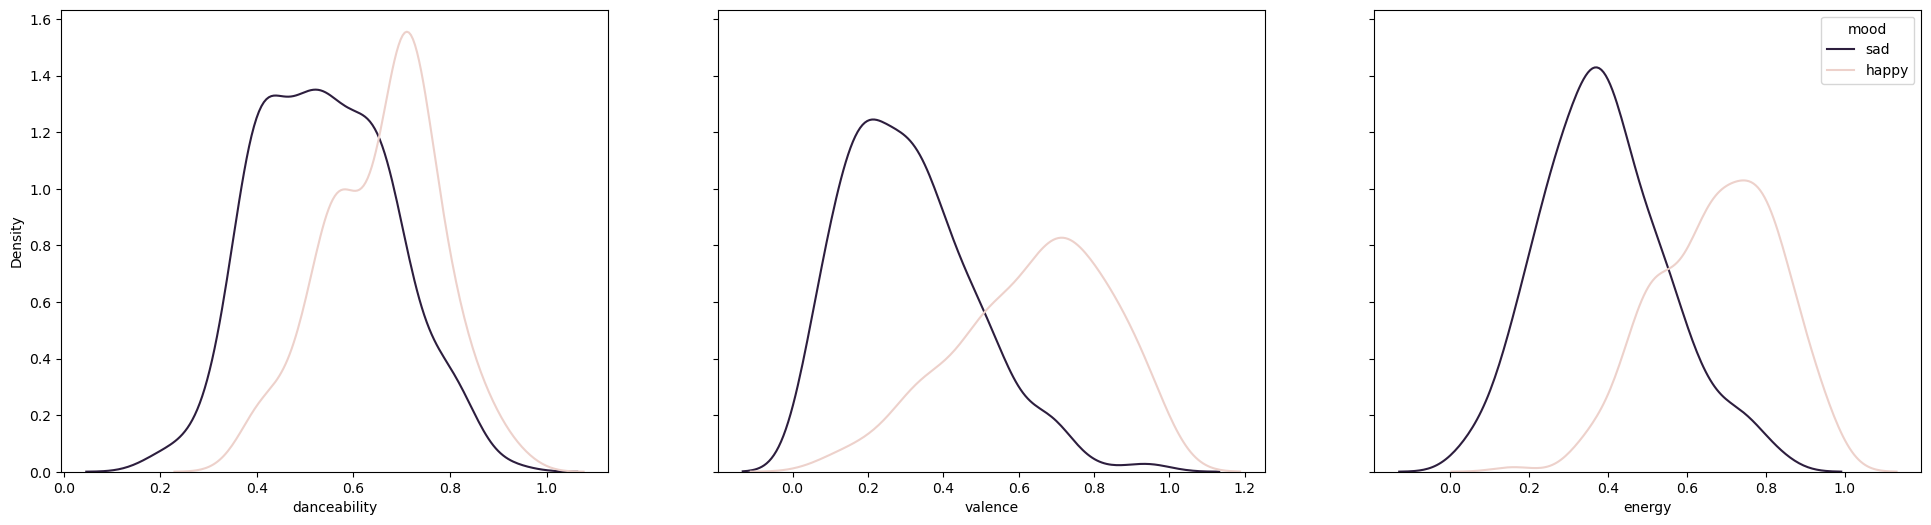

In [20]:
fig, axes = plt.subplots(1,3,figsize=(24,6),sharey=True)
sns.kdeplot(data=df,x='danceability',hue='mood',ax=axes[0])
sns.kdeplot(data=df,x='valence',hue='mood',ax=axes[1])
sns.kdeplot(data=df,x='energy',hue='mood',ax=axes[2])

for ax in axes:
    ax.legend([],[], frameon=False)
ax.legend(title='mood',labels=['sad', 'happy'])
plt.show()

In [21]:
df.columns

Index(['artist', 'album', 'track_name', 'track_id', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'mood'],
      dtype='object')

# Test Train Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
df.drop(['artist','album','track_name','track_id'],axis=1,inplace=True)

In [24]:
X = df.drop(['mood'],axis=1)
y = df['mood']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

# Decision Tree Classification

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtree = DecisionTreeClassifier()

In [28]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation

In [29]:
predictions = dtree.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.87      0.69      0.77        68
           2       0.77      0.91      0.83        77

    accuracy                           0.81       145
   macro avg       0.82      0.80      0.80       145
weighted avg       0.82      0.81      0.80       145



In [32]:
print(confusion_matrix(y_test,predictions))

[[47 21]
 [ 7 70]]


## Tree Visualization

In [33]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[:-1])
features

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

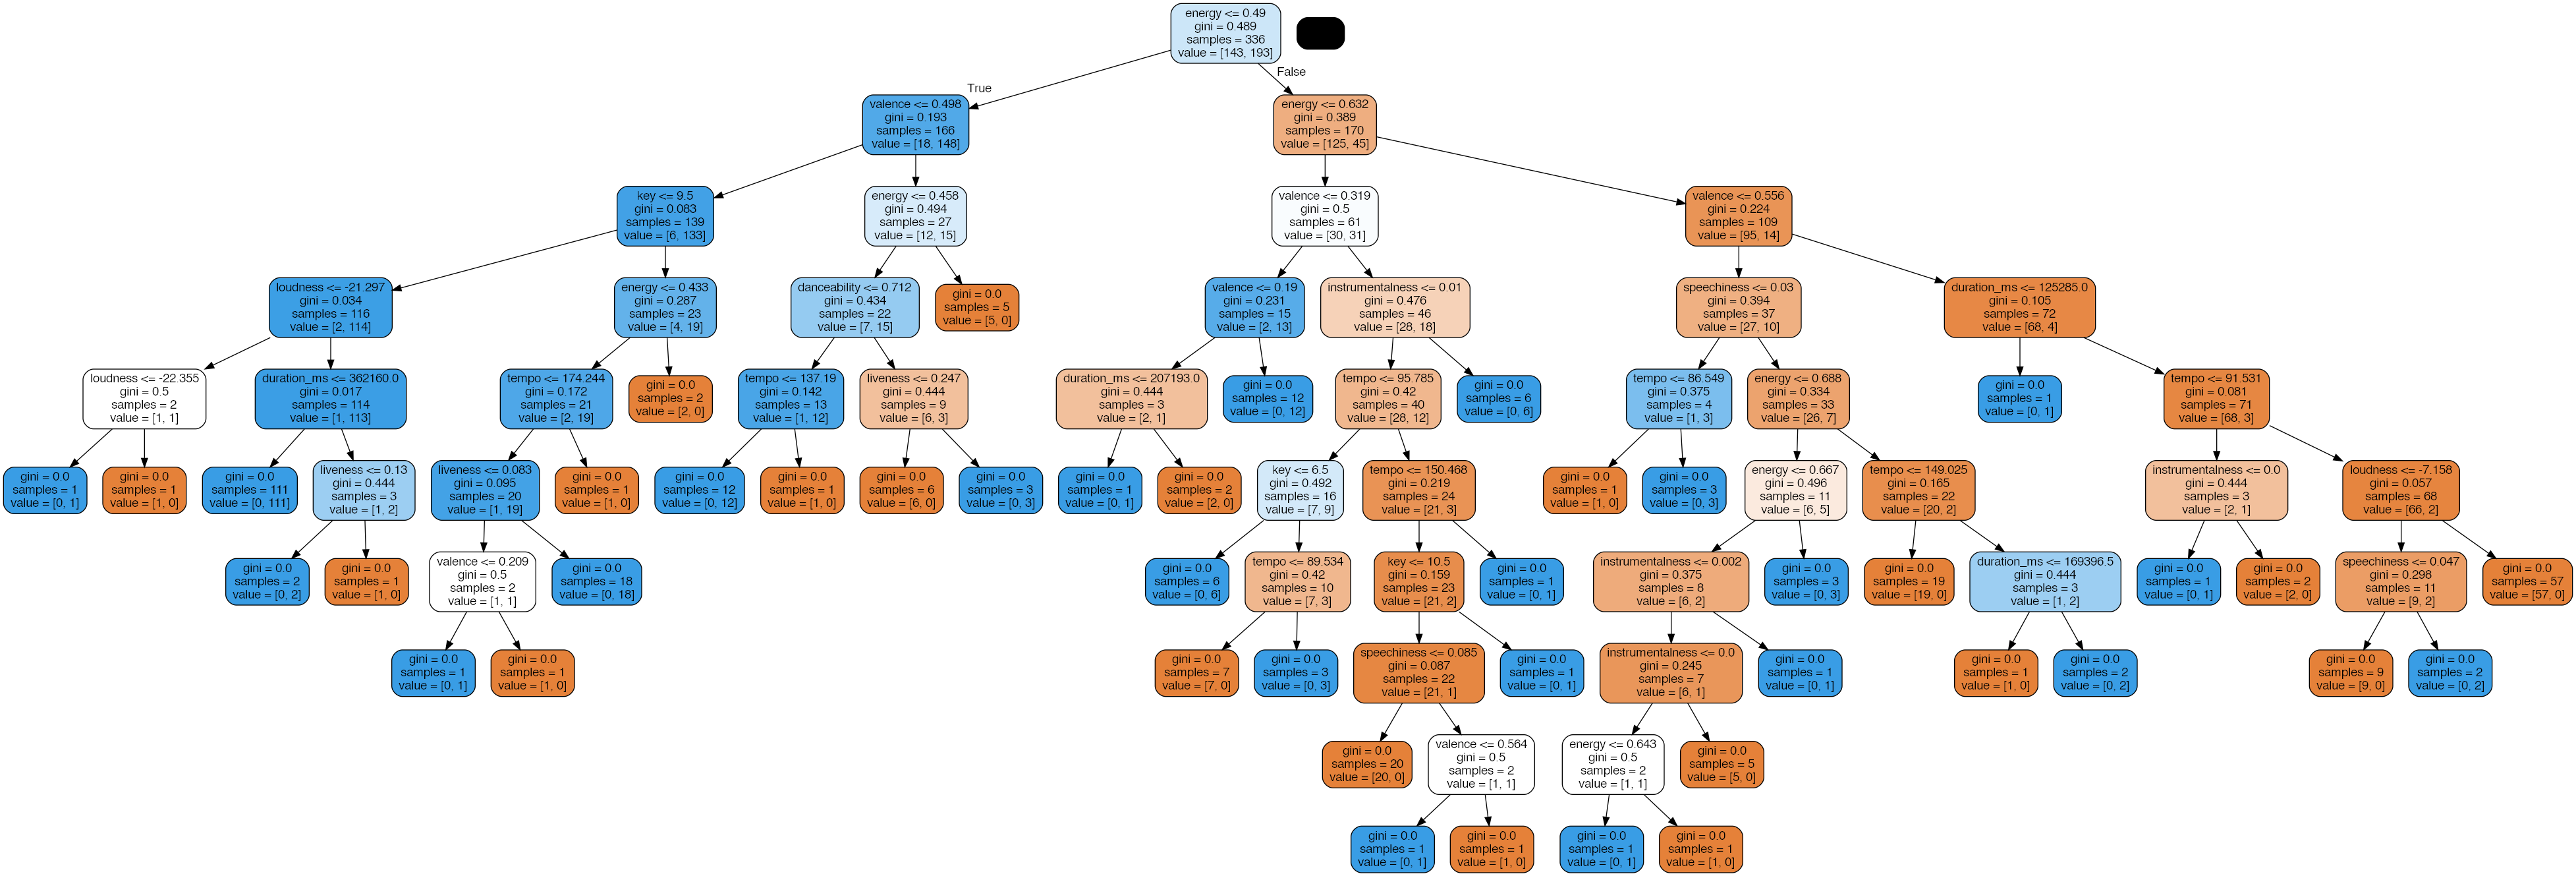

In [34]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

# Random Forest Classification

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier(n_estimators=100)

In [37]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

## Predictions and Evaluations

In [38]:
rfc_pred = rfc.predict(X_test)

In [39]:
print(confusion_matrix(y_test,rfc_pred))

[[60  8]
 [ 8 69]]


In [40]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           1       0.88      0.88      0.88        68
           2       0.90      0.90      0.90        77

    accuracy                           0.89       145
   macro avg       0.89      0.89      0.89       145
weighted avg       0.89      0.89      0.89       145



# Model Evaluation / Tuning

## Feature Seletion

In [41]:
feature_list = list(df.columns)
# Get numerical feature importances
importances = list(rfc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:1} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: energy Importance: 0.26
Variable: valence Importance: 0.21
Variable: loudness Importance: 0.14
Variable: danceability Importance: 0.08
Variable: liveness Importance: 0.06
Variable: tempo Importance: 0.06
Variable: speechiness Importance: 0.05
Variable: duration_ms Importance: 0.05
Variable: instrumentalness Importance: 0.04
Variable: key Importance: 0.03
Variable: mode Importance: 0.01
Variable: time_signature Importance: 0.01


[None, None, None, None, None, None, None, None, None, None, None, None]

Text(0.5, 1.0, 'Cumulative Importances')

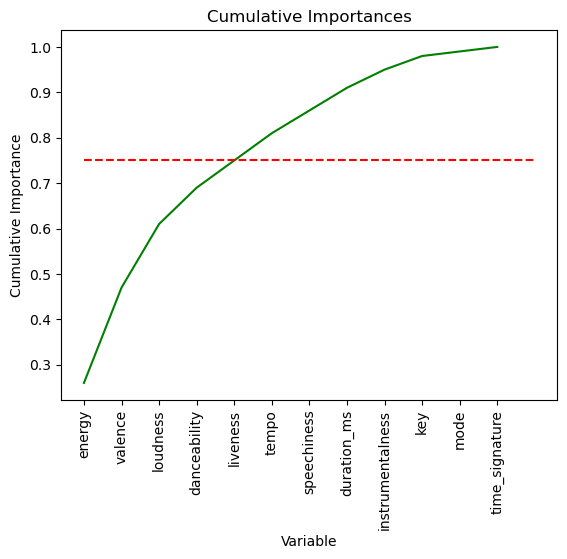

In [42]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 75% of importance retained
plt.hlines(y = 0.75, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance')
plt.title('Cumulative Importances')

In [43]:
# Find number of features for cumulative importance of 80%
# Add 1 because Python is zero-indexed
print('Number of features for 75% importance:', np.where(cumulative_importances > 0.8)[0][0] + 1)

Number of features for 75% importance: 6


In [44]:
df.drop(['speechiness','duration_ms','instrumentalness','key','time_signature','mode'],axis=1,inplace=True)

In [45]:
X = df.drop(['mood'],axis=1)
y = df['mood']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

## Hyperparameter Tuning Through K-Fold CV

In [47]:
from pprint import pprint
# RandomForestClassifier().get_params().keys()
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [49]:
# Create the parameter grid
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [48]:
from sklearn.model_selection import GridSearchCV

In [50]:
# Instantiate the grid search model
grid_search = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,verbose=3)

In [52]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 200}

In [53]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 200}

In [54]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=110, max_features=2, min_samples_leaf=5,
                       min_samples_split=12, n_estimators=200)

In [55]:
grid_predictions = grid_search.predict(X_test)

In [56]:
print(confusion_matrix(y_test,grid_predictions))

[[60  8]
 [ 9 68]]


In [57]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           1       0.87      0.88      0.88        68
           2       0.89      0.88      0.89        77

    accuracy                           0.88       145
   macro avg       0.88      0.88      0.88       145
weighted avg       0.88      0.88      0.88       145



In [58]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 0.1310 degrees.
Accuracy = 90.34%.


In [59]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 0.1172 degrees.
Accuracy = 91.38%.


In [60]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 1.15%.


# Sample Prediction

In [ ]:
vibes_to_reset.head()

In [ ]:
X_test.iloc[0]

In [ ]:
vibes_to_reset.drop(['artist','album','track_name','track_id','speechiness','instrumentalness','liveness','duration_ms','time_signature'],axis=1,inplace=True)

In [ ]:
easily = vibes_to_reset.iloc[2]

In [ ]:
rfc.predict([easily])